In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Optional: XGBoost for better accuracy
from xgboost import XGBRegressor

In [2]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.shape

(8190, 12)

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
train = train.merge(features, on=['Store','Date'], how='left')

In [9]:
train = train.merge(stores, on='Store', how='left')


In [10]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [12]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [13]:
# Convert date to datetime and create time-based features
train['Date'] = pd.to_datetime(train['Date'])
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week
train['Year'] = train['Date'].dt.year

In [14]:
train = train.sort_values(['Store','Dept','Date'])
for lag in range(1, 5):  # Lag_1 to Lag_4
    train[f'Lag_{lag}'] = train.groupby(['Store','Dept'])['Weekly_Sales'].shift(lag)
    

In [15]:
# Rolling averages
train['Rolling_Mean_3'] = train.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(3).mean()
train['Rolling_Mean_4'] = train.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(4).mean()

In [16]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Day,Month,Week,Year,Lag_1,Lag_2,Lag_3,Lag_4,Rolling_Mean_3,Rolling_Mean_4
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,5,2,5,2010,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,12,2,6,2010,24924.50,NaN,NaN,NaN,NaN,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,19,2,7,2010,46039.49,24924.50,NaN,NaN,NaN,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,26,2,8,2010,41595.55,46039.49,24924.50,NaN,37519.846667,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,5,3,9,2010,19403.54,41595.55,46039.49,24924.5,35679.526667,32990.77


In [17]:
# Fix IsHoliday column
train['IsHoliday'] = train['IsHoliday_y']
train.drop(columns=['IsHoliday_x','IsHoliday_y'], inplace=True)


In [18]:
train.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Month,Week,Year,Lag_1,Lag_2,Lag_3,Lag_4,Rolling_Mean_3,Rolling_Mean_4,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,...,2,5,2010,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,1,2010-02-12,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,...,2,6,2010,24924.50,NaN,NaN,NaN,NaN,NaN,True
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,...,2,7,2010,46039.49,24924.50,NaN,NaN,NaN,NaN,False
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,...,2,8,2010,41595.55,46039.49,24924.50,NaN,37519.846667,NaN,False
4,1,1,2010-03-05,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,...,3,9,2010,19403.54,41595.55,46039.49,24924.5,35679.526667,32990.77,False


In [19]:
# Drop NaN rows generated by lag/rolling
train = train.dropna()

In [20]:
train.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Month,Week,Year,Lag_1,Lag_2,Lag_3,Lag_4,Rolling_Mean_3,Rolling_Mean_4,IsHoliday
92,1,1,2011-11-11,18689.54,59.11,3.297,10382.90,6115.67,215.07,2406.62,...,11,45,2011,39886.06,31579.90,23351.80,23077.55,31605.920000,29473.8275,False
93,1,1,2011-11-18,19050.66,62.25,3.308,6074.12,254.39,51.98,427.39,...,11,46,2011,18689.54,39886.06,31579.90,23351.80,30051.833333,28376.8250,False
94,1,1,2011-11-25,20911.25,60.14,3.236,410.31,98.00,55805.51,8.00,...,11,47,2011,19050.66,18689.54,39886.06,31579.90,25875.420000,27301.5400,True
95,1,1,2011-12-02,25293.49,48.91,3.172,5629.51,68.00,1398.11,2084.64,...,12,48,2011,20911.25,19050.66,18689.54,39886.06,19550.483333,24634.3775,False
96,1,1,2011-12-09,33305.92,43.93,3.158,4640.65,19.00,105.02,3639.42,...,12,49,2011,25293.49,20911.25,19050.66,18689.54,21751.800000,20986.2350,False


In [21]:
# One-hot encoding for categorical variables
train = pd.get_dummies(train, columns=['Type','IsHoliday'], drop_first=True)

In [22]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'Day', 'Month', 'Week', 'Year', 'Lag_1',
       'Lag_2', 'Lag_3', 'Lag_4', 'Rolling_Mean_3', 'Rolling_Mean_4', 'Type_B',
       'Type_C', 'IsHoliday_True'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, root_mean_squared_error

In [24]:
features_list = ['Store','Dept','Day','Month','Week','Year','Size','Lag_1','Temperature',
                 'Fuel_Price','CPI','Unemployment','Type_B',
                 'Type_C','IsHoliday_True']

X = train[features_list]
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse}')

RMSE: 5068.357786004185


In [25]:
# Model 2: XGBoost (optional, often better)
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost RMSE: {rmse_xgb}')

XGBoost RMSE: 3608.691217739486


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_xgb)
print(f'R² : {r2}')


R² : 0.9703165504350163


In [27]:
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')


R²: 0.9414469591421717


In [28]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_xgb)
print(f'MAE: {mae}')

MAE: 1742.088402218603


In [29]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 2028.8053947061555


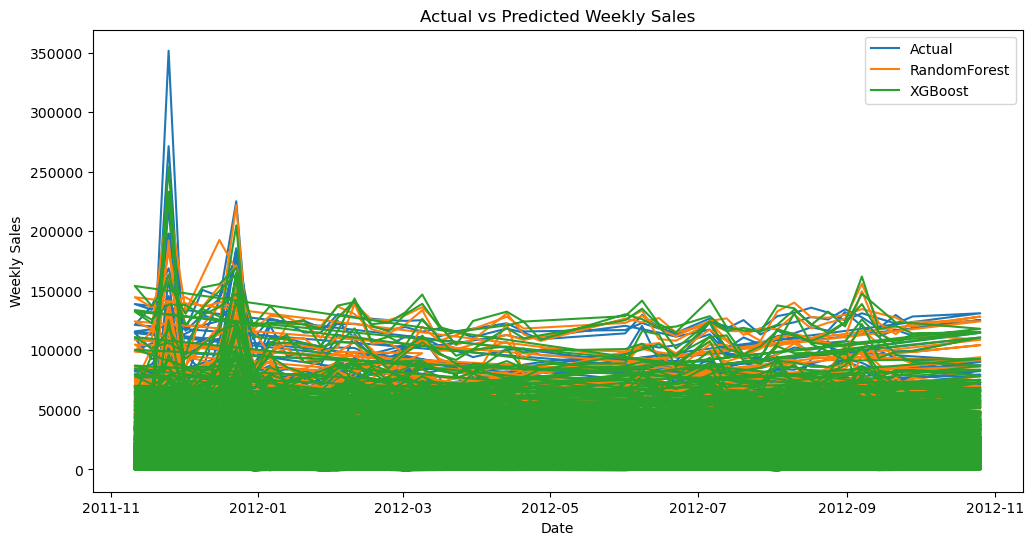

In [30]:
# Plot predictions
plt.figure(figsize=(12,6))
plt.plot(train['Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(train['Date'].iloc[-len(y_test):], y_pred, label='RandomForest')
plt.plot(train['Date'].iloc[-len(y_test):], y_pred_xgb, label='XGBoost')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.legend()
plt.show()